In [211]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
import plotly.express as px
# library
import seaborn as sns

#Importamos dependencias
import statsmodels.api as sm
import statsmodels.formula.api as sfm

from matplotlib.widgets import Slider, Button, RadioButtons
from scipy import interp
from scipy.optimize import fsolve
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from statsmodels.formula.api import ols

In [56]:
!ls

ACT.xlsx
ACT_DESAGREGADO.xlsx
Adher.csv
Adherencia.xlsx
Antecedentes_familiares.xlsx
Antecedentes_patologicos.xlsx
Ayudas_diagnosticas.xlsx
Biologicos Asma.xlsx
Calidad de vida relacioada en salud.xlsx
Datos basicos.xlsx
Detalle
Disnea.xlsx
Farmacovigilancia RAM.xlsx
Habitos.xlsx
Hospitalizaciones.xlsx
Incosistencias en reclamacion.xlsx
Medicamentos.xlsx
Mediciones de peso y talla.xlsx
Predicción.ipynb
Urgencias.xlsx
Vacunacion.xlsx


> ¿Está la adherencia relacionada con los hábitos?

In [57]:
adh_df = pd.read_csv('Adher.csv')

In [58]:
adh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 9 columns):
id_patient             4773 non-null int64
survey_date            4773 non-null object
morisky_green          4773 non-null object
smaq1                  4773 non-null object
smaq2                  4773 non-null object
espa                   4773 non-null object
nm_espa                4773 non-null float64
qualitative_result     4773 non-null object
quantitative_result    4773 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 335.7+ KB


In [59]:
adh_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id_patient,4773,NaN,NaN,NaN,1.23818e+06,429639,500547,871633,1.22648e+06,1.61737e+06,1.99963e+06
survey_date,4773,1433,2019-04-30,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
morisky_green,4773,2,si,4052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smaq1,4773,2,si,3991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smaq2,4773,5,95-100%,4311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
espa,4773,2,si,3962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nm_espa,4773,NaN,NaN,NaN,5.60298,0.911489,0,5,6,6,6
qualitative_result,4773,2,si,3785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantitative_result,4773,5,95-100%,4311,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
adh_df.head() #adh_df[['id_patient', 'survey_date', 'quantitative_result']]

,id_patient,survey_date,morisky_green,smaq1,smaq2,espa,nm_espa,qualitative_result,quantitative_result
0,529410,2012-04-19,no,si,95-100%,no,6.0,no,95-100%
1,1101180,2012-04-24,no,si,95-100%,no,4.0,no,95-100%
2,1053118,2012-05-03,no,si,95-100%,no,6.0,no,95-100%
3,1198956,2012-05-16,no,si,95-100%,no,6.0,no,95-100%
4,605968,2012-05-17,no,si,95-100%,no,5.0,no,95-100%


In [62]:
adh_df.dtypes

id_patient                int64
survey_date              object
morisky_green            object
smaq1                    object
smaq2                    object
espa                     object
nm_espa                 float64
qualitative_result       object
quantitative_result    category
dtype: object

In [61]:
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=['NO APLICA', 
                                        '<30%',
                                        '30-65%',
                                        '64-84%',
                                        '85-94%',                                       
                                        '95-100%'], ordered=True)
adh_df['quantitative_result'] = adh_df['quantitative_result'].astype(cat_type)

In [63]:
adh_df['quantitative_result'].cat.codes.head()

0    5
1    5
2    5
3    5
4    5
dtype: int8

In [64]:
adh_df['id_patient'].value_counts().head()

1769865    41
979605     30
1132214    28
622031     27
1676414    26
Name: id_patient, dtype: int64

In [65]:
df_0 = adh_df[adh_df['id_patient'] == 1769865].copy()
df_0.sort_values('quantitative_result').head()

,id_patient,survey_date,morisky_green,smaq1,smaq2,espa,nm_espa,qualitative_result,quantitative_result
1247,1769865,2016-07-05,si,no,<30%,si,6.0,no,<30%
1470,1769865,2016-10-26,no,no,30-65%,no,5.0,no,30-65%
1437,1769865,2016-10-11,no,no,30-65%,no,5.0,no,30-65%
1337,1769865,2016-09-06,no,no,30-65%,no,5.0,no,30-65%
1262,1769865,2016-07-26,no,no,30-65%,no,5.0,no,30-65%


In [66]:
import plotly.express as px
#df = px.data.iris()
fig = px.scatter(df_0.sort_values('quantitative_result'), 
                 x="survey_date", 
                 y="quantitative_result", 
                 color="qualitative_result")
fig.update_layout(yaxis_type='category',
                  title_text='Bar chart with categorical axes')
fig.show()

In [348]:
#Dataset de hábitos Habitos.xlsx
hab_df = pd.read_csv('habits.csv')

In [349]:
hab_df.head().columns

Index(['Unnamed: 0', 'id_patient', 'registration_date', 'habit_one',
       'habit_two'],
      dtype='object')

In [350]:
hab_df.shape

(1931, 5)

In [351]:
temp_df = hab_df[['id_patient', 'registration_date',  'habit_one', 'habit_two']].groupby(by = ['id_patient', 'registration_date', 'habit_one'], as_index = False).agg('first')
temp_df['new_id'] = temp_df['id_patient'].apply(lambda x: str(x)) +"|"+ temp_df['registration_date'].apply(lambda x: str(x))
temp_df = temp_df.pivot(index = 'new_id', columns="habit_one",values="habit_two").reset_index()
temp_df['id_patient'] = temp_df['new_id'].str.split("|").apply(lambda x: int(x[0]))                                                             
temp_df['registration_date'] = temp_df['new_id'].str.split("|").apply(lambda x: x[1])
#temp_df['registration_date'] = pd.to_datetime(temp_df['registration_date'])
temp_df = temp_df.drop('new_id', axis = 1)
temp_df.head()
#temp_df.set_index(['id_patient', 'registration_date']).pivot( columns="habit_one",values="habit_two")

habit_one,ALCOHOL,ALIMENTACION,CIGARRILLO,CONSUMO DE CAFE,EJERCICIO,ESTADO ANÍMICO,MASCOTAS,METODO DE PLANIFICACION,SUSTANCIAS PSICOACTIVAS,id_patient,registration_date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IMPLANTE SUBDERMICO,NaN,1001619,2011-11-01
1,BEBEDOR EXCEPCIONAL,BUENA ALIMENTACION,NO,NaN,1 VEZ POR SEMANA,NaN,NO,NaN,NaN,1001619,2012-07-12
2,ABSTEMIO,BUENA ALIMENTACION,NO,NaN,3 VECES POR SEMANA,NaN,NaN,NaN,NaN,1004538,2015-08-25
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HISTERECTOMIA,NaN,1004538,2017-09-07
4,NaN,REGULAR ALIMENTACION,NaN,NaN,NO REALIZA EJERCICIO,ANIMICAMENTE ESTABLE,NO,NaN,NaN,1008837,2011-03-18


In [352]:
hab_df = temp_df
df_1 = hab_df[['id_patient', 'registration_date']].rename(columns = {'registration_date':'r_date'}).copy()
df_1['quantitative_result'] = np.nan #qualitative_result
df_1['qualitative_result'] = np.nan
df_1['source'] = 'habits'
print(df_1.shape)
print(df_1.info())
df_1.head()

(856, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 5 columns):
id_patient             856 non-null int64
r_date                 856 non-null object
quantitative_result    0 non-null float64
qualitative_result     0 non-null float64
source                 856 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 33.5+ KB
None


habit_one,id_patient,r_date,quantitative_result,qualitative_result,source
0,1001619,2011-11-01,NaN,NaN,habits
1,1001619,2012-07-12,NaN,NaN,habits
2,1004538,2015-08-25,NaN,NaN,habits
3,1004538,2017-09-07,NaN,NaN,habits
4,1008837,2011-03-18,NaN,NaN,habits


In [353]:
df_2 = adh_df[['id_patient', 'survey_date', 'quantitative_result', 'qualitative_result']].rename(columns = {'survey_date':'r_date'}).copy()
df_2['source'] = 'adherence'
print(df_2.shape)
print(df_2.info())
df_2.head()

(4773, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 5 columns):
id_patient             4773 non-null int64
r_date                 4773 non-null object
quantitative_result    4773 non-null category
qualitative_result     4773 non-null object
source                 4773 non-null object
dtypes: category(1), int64(1), object(3)
memory usage: 154.1+ KB
None


,id_patient,r_date,quantitative_result,qualitative_result,source
0,529410,2012-04-19,95-100%,no,adherence
1,1101180,2012-04-24,95-100%,no,adherence
2,1053118,2012-05-03,95-100%,no,adherence
3,1198956,2012-05-16,95-100%,no,adherence
4,605968,2012-05-17,95-100%,no,adherence


In [354]:
df_3 = df_1.append(df_2)
print(df_3.shape)
df_3['id_patient'].value_counts().head(20)

(5629, 5)


1769865    44
979605     33
1132214    31
622031     30
692765     29
1676414    28
1196034    27
916510     26
1437443    26
1536265    26
832593     25
1764814    25
1828862    25
871633     25
1399081    25
1199605    24
747471     24
813655     23
1715065    23
801004     22
Name: id_patient, dtype: int64

In [355]:
df_3[df_3['id_patient'] == 1769865].sort_values('r_date')

habit_one,id_patient,r_date,quantitative_result,qualitative_result,source
468,1769865,2012-10-18,NaN,NaN,habits
31,1769865,2012-10-18,85-94%,no,adherence
469,1769865,2013-03-15,NaN,NaN,habits
88,1769865,2013-04-15,95-100%,si,adherence
292,1769865,2014-02-10,85-94%,no,adherence
477,1769865,2014-09-19,95-100%,si,adherence
553,1769865,2014-10-28,85-94%,no,adherence
616,1769865,2015-01-09,85-94%,no,adherence
778,1769865,2015-08-26,85-94%,no,adherence
810,1769865,2015-09-11,95-100%,si,adherence


In [356]:
import plotly.express as px
#df = px.data.iris()
fig = px.scatter(df_3[df_3['id_patient'] == 1769865].sort_values('quantitative_result'), x="r_date", y="quantitative_result")
fig.update_layout(yaxis_type='category',
                  title_text='Bar chart with categorical axes')
fig.show()

In [357]:
df_3.head()

habit_one,id_patient,r_date,quantitative_result,qualitative_result,source
0,1001619,2011-11-01,NaN,NaN,habits
1,1001619,2012-07-12,NaN,NaN,habits
2,1004538,2015-08-25,NaN,NaN,habits
3,1004538,2017-09-07,NaN,NaN,habits
4,1008837,2011-03-18,NaN,NaN,habits


In [358]:
df_3.dtypes

habit_one
id_patient              int64
r_date                 object
quantitative_result    object
qualitative_result     object
source                 object
dtype: object

In [359]:
cat_type = CategoricalDtype(categories=['NO APLICA', 
                                        '<30%',
                                        '30-65%',
                                        '64-84%',
                                        '85-94%',                                       
                                        '95-100%'], ordered=True)
df_3['quantitative_result'] = df_3['quantitative_result'].astype(cat_type)

In [360]:
#qualitative_result
df_3['qualitative_result'].value_counts()

cat_type = CategoricalDtype(categories=['si', 
                                        'no'], ordered=True)
df_3['qualitative_result'] = df_3['qualitative_result'].astype(cat_type)

In [361]:
def fill_nas(g):
    if sum(g['quantitative_result'].notna()) > 0:
        #Backward
        g['quantitative_result'] = g['quantitative_result'].fillna(method='bfill')
        g['qualitative_result'] = g['qualitative_result'].fillna(method='bfill')
        #Forward
        g['quantitative_result'] = g['quantitative_result'].interpolate(method='pad')
        g['qualitative_result'] = g['qualitative_result'].interpolate(method='pad')
    if sum(g['quantitative_result'].isna()) > 0:
        print(g)
    return g

#g['quantitative_result'].interpolate(method='pad', limit_direction = 'backward')
print(df_3.sort_values(by = ['id_patient', 'r_date']).groupby('id_patient').apply(lambda x:x).info())
df_4 = df_3.sort_values(by = ['id_patient', 'r_date']).groupby('id_patient').apply(lambda x:fill_nas(x))
df_4

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5629 entries, 1253 to 3100
Data columns (total 5 columns):
id_patient             5629 non-null int64
r_date                 5629 non-null object
quantitative_result    4773 non-null category
qualitative_result     4773 non-null category
source                 5629 non-null object
dtypes: category(2), int64(1), object(2)
memory usage: 187.2+ KB
None
habit_one  id_patient      r_date quantitative_result qualitative_result  \
692            684112  2017-11-08                 NaN                NaN   

habit_one  source  
692        habits  
habit_one  id_patient      r_date quantitative_result qualitative_result  \
300           1487899  2016-01-29                 NaN                NaN   

habit_one  source  
300        habits  
habit_one  id_patient      r_date quantitative_result qualitative_result  \
403           1671238  2017-09-13                 NaN                NaN   

habit_one  source  
403        habits  
habit_one  id_patie

habit_one,id_patient,r_date,quantitative_result,qualitative_result,source
1253,500547,2016-07-11,95-100%,si,adherence
3621,500547,2019-03-14,95-100%,si,adherence
4227,500547,2019-10-11,95-100%,si,adherence
4361,500547,2019-12-09,95-100%,si,adherence
4413,500547,2020-01-16,95-100%,si,adherence
4564,500547,2020-03-25,95-100%,si,adherence
4729,500547,2020-05-08,95-100%,si,adherence
590,500588,2017-09-13,95-100%,si,habits
3691,500588,2019-04-26,95-100%,si,adherence
445,502989,2014-08-22,64-84%,no,adherence


In [362]:
user = 1764814
fig = px.scatter(df_4[df_4['id_patient'] == user].sort_values('quantitative_result'), 
                 x="r_date", 
                 y="quantitative_result",
                color="source")
fig.update_layout(yaxis_type='category',
                  title_text='Bar chart with categorical axes')
fig.show()

print(df_4[df_4['id_patient'] == user])

habit_one  id_patient      r_date quantitative_result qualitative_result  \
462           1764814  2011-08-25             95-100%                 si   
24            1764814  2012-09-28             95-100%                 si   
463           1764814  2013-05-15             95-100%                 si   
116           1764814  2013-05-15             95-100%                 si   
143           1764814  2013-06-26             95-100%                 si   
178           1764814  2013-08-12             95-100%                 si   
253           1764814  2013-12-26             95-100%                 si   
281           1764814  2014-02-03             95-100%                 si   
686           1764814  2015-05-07             95-100%                 si   
826           1764814  2015-09-22             95-100%                 no   
464           1764814  2015-10-09             95-100%                 si   
852           1764814  2015-10-09             95-100%                 si   
1114        

In [363]:
df_4[df_4['source']=='habits'].head()

habit_one,id_patient,r_date,quantitative_result,qualitative_result,source
590,500588,2017-09-13,95-100%,si,habits
591,502989,2017-08-31,95-100%,no,habits
592,506808,2014-12-16,95-100%,si,habits
593,506808,2017-09-07,95-100%,si,habits
594,512938,2017-09-12,95-100%,si,habits


In [364]:
df_4.columns

Index(['id_patient', 'r_date', 'quantitative_result', 'qualitative_result',
       'source'],
      dtype='object', name='habit_one')

In [367]:
hab_df.drop_duplicates().shape

(856, 11)

In [368]:
hab_df.head()

habit_one,ALCOHOL,ALIMENTACION,CIGARRILLO,CONSUMO DE CAFE,EJERCICIO,ESTADO ANÍMICO,MASCOTAS,METODO DE PLANIFICACION,SUSTANCIAS PSICOACTIVAS,id_patient,registration_date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IMPLANTE SUBDERMICO,NaN,1001619,2011-11-01
1,BEBEDOR EXCEPCIONAL,BUENA ALIMENTACION,NO,NaN,1 VEZ POR SEMANA,NaN,NO,NaN,NaN,1001619,2012-07-12
2,ABSTEMIO,BUENA ALIMENTACION,NO,NaN,3 VECES POR SEMANA,NaN,NaN,NaN,NaN,1004538,2015-08-25
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HISTERECTOMIA,NaN,1004538,2017-09-07
4,NaN,REGULAR ALIMENTACION,NaN,NaN,NO REALIZA EJERCICIO,ANIMICAMENTE ESTABLE,NO,NaN,NaN,1008837,2011-03-18


In [370]:
df_5 = hab_df.join(df_4[df_4['source']=='habits'][['quantitative_result', 'qualitative_result']])
df_5.head()

habit_one,ALCOHOL,ALIMENTACION,CIGARRILLO,CONSUMO DE CAFE,EJERCICIO,ESTADO ANÍMICO,MASCOTAS,METODO DE PLANIFICACION,SUSTANCIAS PSICOACTIVAS,id_patient,registration_date,quantitative_result,qualitative_result
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IMPLANTE SUBDERMICO,NaN,1001619,2011-11-01,<30%,no
1,BEBEDOR EXCEPCIONAL,BUENA ALIMENTACION,NO,NaN,1 VEZ POR SEMANA,NaN,NO,NaN,NaN,1001619,2012-07-12,<30%,no
2,ABSTEMIO,BUENA ALIMENTACION,NO,NaN,3 VECES POR SEMANA,NaN,NaN,NaN,NaN,1004538,2015-08-25,95-100%,si
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HISTERECTOMIA,NaN,1004538,2017-09-07,95-100%,si
4,NaN,REGULAR ALIMENTACION,NaN,NaN,NO REALIZA EJERCICIO,ANIMICAMENTE ESTABLE,NO,NaN,NaN,1008837,2011-03-18,95-100%,si


In [371]:
df_5.columns

Index(['ALCOHOL', 'ALIMENTACION', 'CIGARRILLO', 'CONSUMO DE CAFE', 'EJERCICIO',
       'ESTADO ANÍMICO', 'MASCOTAS', 'METODO DE PLANIFICACION',
       'SUSTANCIAS PSICOACTIVAS', 'id_patient', 'registration_date',
       'quantitative_result', 'qualitative_result'],
      dtype='object', name='habit_one')

In [372]:
selected_features = ['ALCOHOL', 'ALIMENTACION', 'CIGARRILLO', 'CONSUMO DE CAFE', 'EJERCICIO',
       'ESTADO ANÍMICO', 'MASCOTAS', 'METODO DE PLANIFICACION',
       'SUSTANCIAS PSICOACTIVAS']

df_5['registration_date'] = pd.to_datetime(df_5['registration_date'])

for column in selected_features:
  df_5[column] = df_5[column].astype('category')

In [373]:
df_5.dtypes

habit_one
ALCOHOL                          category
ALIMENTACION                     category
CIGARRILLO                       category
CONSUMO DE CAFE                  category
EJERCICIO                        category
ESTADO ANÍMICO                   category
MASCOTAS                         category
METODO DE PLANIFICACION          category
SUSTANCIAS PSICOACTIVAS          category
id_patient                          int64
registration_date          datetime64[ns]
quantitative_result              category
qualitative_result               category
dtype: object

# Regresión logistica para cada variable

(849, 13)
         Current function value: 0.587246
         Iterations: 35


/Users/luisrojas/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  849
Model:                          Logit   Df Residuals:                      844
Method:                           MLE   Df Model:                            4
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                0.006402
Time:                        11:57:02   Log-Likelihood:                -498.57
converged:                      False   LL-Null:                       -501.78
Covariance Type:            nonrobust   LLR p-value:                    0.1696
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
ALCOHOL_BEBEDOR ABUSIVO SIN DEPENDENCIA   -21.6194   5.52e+04     -0.000      1.000   -1.08e+05    1.08e+05
ALCOHOL_BEBEDOR EXCEPCIONAL                -

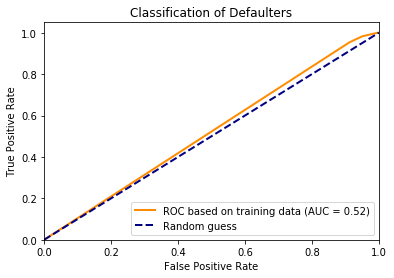

         Current function value: 0.583315
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  849
Model:                          Logit   Df Residuals:                      844
Method:                           MLE   Df Model:                            4
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                 0.01305
Time:                        11:57:04   Log-Likelihood:                -495.23
converged:                      False   LL-Null:                       -501.78
Covariance Type:            nonrobust   LLR p-value:                   0.01080
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
ALIMENTACION_DIETA ESPECIAL                   -1.3393      0.747     -1.792     

/Users/luisrojas/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



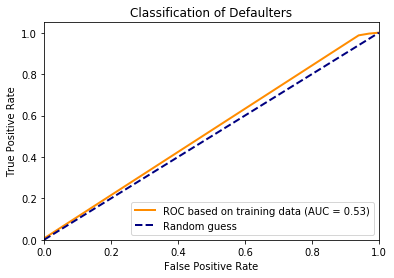

         Current function value: 0.571950
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  849
Model:                          Logit   Df Residuals:                      844
Method:                           MLE   Df Model:                            4
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                 0.03228
Time:                        11:57:04   Log-Likelihood:                -485.59
converged:                      False   LL-Null:                       -501.78
Covariance Type:            nonrobust   LLR p-value:                 1.587e-06
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
CIGARRILLO_B. ENTRE 6 Y 15 CIGARRILLOS EN PROMED

/Users/luisrojas/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



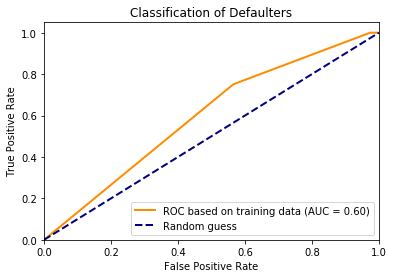

         Current function value: 0.586832
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  849
Model:                          Logit   Df Residuals:                      845
Method:                           MLE   Df Model:                            3
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                0.007103
Time:                        11:57:05   Log-Likelihood:                -498.22
converged:                      False   LL-Null:                       -501.78
Covariance Type:            nonrobust   LLR p-value:                   0.06793
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
CONSUMO DE CAFE_4 a 6 tazas/dia       -1.0476      1.072     -0.977      0.328      -3.149      

/Users/luisrojas/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



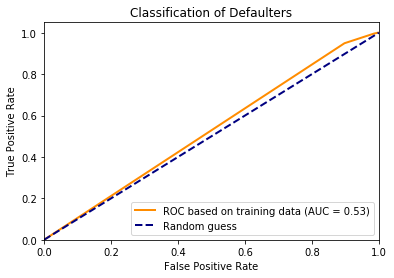

         Current function value: 0.572896
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  849
Model:                          Logit   Df Residuals:                      842
Method:                           MLE   Df Model:                            6
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                 0.03068
Time:                        11:57:06   Log-Likelihood:                -486.39
converged:                      False   LL-Null:                       -501.78
Covariance Type:            nonrobust   LLR p-value:                 2.780e-05
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
EJERCICIO_2 VECES POR SEMANA                   -0.4470      0.516     -0.866  

/Users/luisrojas/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



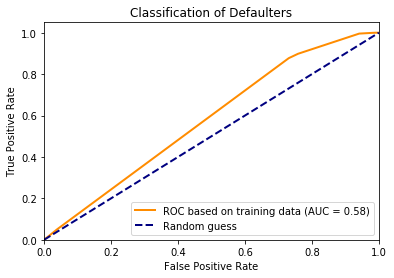

Optimization terminated successfully.
         Current function value: 0.590996
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  849
Model:                          Logit   Df Residuals:                      847
Method:                           MLE   Df Model:                            1
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:               5.672e-05
Time:                        11:57:06   Log-Likelihood:                -501.76
converged:                       True   LL-Null:                       -501.78
Covariance Type:            nonrobust   LLR p-value:                    0.8114
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
ESTADO ANÍMICO_ANIMICAMENTE INESTABLE     0.1459      

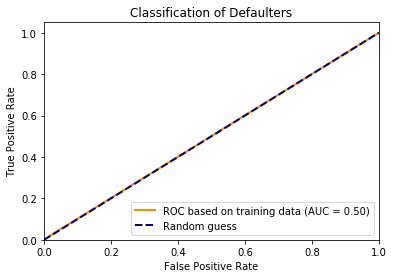

         Current function value: 0.583406
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  849
Model:                          Logit   Df Residuals:                      843
Method:                           MLE   Df Model:                            5
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                 0.01290
Time:                        11:57:07   Log-Likelihood:                -495.31
converged:                      False   LL-Null:                       -501.78
Covariance Type:            nonrobust   LLR p-value:                   0.02390
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
MASCOTAS_GATO           -1.0952      1.072     -1.021      0.307      -3.197       1.006
MASCOTAS_NO             -0.5475    

/Users/luisrojas/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



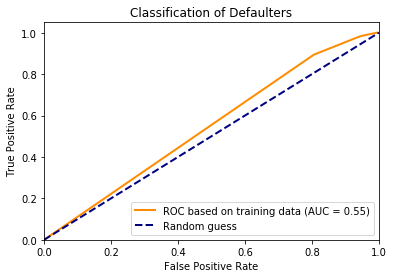

Optimization terminated successfully.
         Current function value: 0.573711
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  849
Model:                          Logit   Df Residuals:                      838
Method:                           MLE   Df Model:                           10
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                 0.02930
Time:                        11:57:07   Log-Likelihood:                -487.08
converged:                       True   LL-Null:                       -501.78
Covariance Type:            nonrobust   LLR p-value:                  0.001070
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------

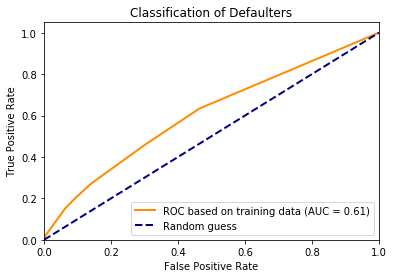

         Current function value: 0.590646
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  849
Model:                          Logit   Df Residuals:                      847
Method:                           MLE   Df Model:                            1
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:               0.0006495
Time:                        11:57:07   Log-Likelihood:                -501.46
converged:                      False   LL-Null:                       -501.78
Covariance Type:            nonrobust   LLR p-value:                    0.4195
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
SUSTANCIAS PSICOACTIVAS_ADICTO   -18.1950   1.44e+04     -0.001      0.999   -2.82e+04    2.82e+04
Inter

/Users/luisrojas/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



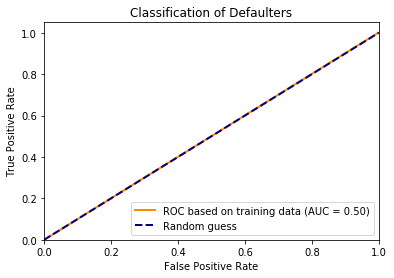

In [374]:
#%%time
vars_to_see_0 = ['ALCOHOL', 'ALIMENTACION', 'CIGARRILLO', 'CONSUMO DE CAFE', 'EJERCICIO',
       'ESTADO ANÍMICO', 'MASCOTAS', 'METODO DE PLANIFICACION',
       'SUSTANCIAS PSICOACTIVAS'                 
               ]
df = df_5[df_5['qualitative_result'].notna()]
print(df.shape)
for c in vars_to_see_0:
    vars_to_see = [c]
    dfs = []
    for column in vars_to_see:
      dfs.append(pd.get_dummies(df[column], prefix=column, drop_first=True))

    df_log_x = pd.concat(dfs, axis=1)
    df_log_x['Intercept'] = 1

    logit_full1 = sm.Logit(df['qualitative_result'].cat.codes, df_log_x)
    logit_full1_res = logit_full1.fit()
    predict_withvs = logit_full1_res.predict(df_log_x)
    print(logit_full1_res.summary())

    #%matplotlib inline

    #Next we plot the ROC curve:
    roc_vs = roc_curve(df['qualitative_result'].astype('category').cat.codes, predict_withvs)
    auc_vs = auc( roc_vs[0], roc_vs[1] )

    plt.figure()
    line_width = 2
    plt.plot(roc_vs[0], roc_vs[1], color='darkorange', lw=line_width,
             label=f"ROC based on training data (AUC = {auc_vs:0.2f})")
    plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Classification of Defaulters')
    plt.legend(loc='lower right')
    plt.show()

# Regresión logistica para varias variables

In [477]:
%%time
vars_to_see = ['ALCOHOL', 
               'ALIMENTACION', 
               'CIGARRILLO', 
               #'CONSUMO DE CAFE', 
               'EJERCICIO',
               #'ESTADO ANÍMICO', 
               'MASCOTAS', 
               'METODO DE PLANIFICACION',
               #'SUSTANCIAS PSICOACTIVAS'                 
               ]

df = df_5[df_5['qualitative_result'].notna()]

dfs = []
for column in vars_to_see:
  dfs.append(pd.get_dummies(df[column], prefix=column, drop_first=True))

df_log_x = pd.concat(dfs, axis=1)

CPU times: user 17.6 ms, sys: 9.4 ms, total: 27 ms
Wall time: 25.6 ms


                                                level_0  \
380                                       CIGARRILLO_NO   
572                      EJERCICIO_NO REALIZA EJERCICIO   
9               ALCOHOL_BEBEDOR ABUSIVO SIN DEPENDENCIA   
297   CIGARRILLO_C. MAS DE 16 CIGARRILLOS EN PROMEDI...   
263                   ALIMENTACION_REGULAR ALIMENTACION   
1063                 METODO DE PLANIFICACION_VASECTOMIA   
638                                         MASCOTAS_NO   
382                                       CIGARRILLO_NO   
98                             ALCOHOL_BEBEDOR MODERADO   
1058                 METODO DE PLANIFICACION_VASECTOMIA   

                                                level_1         0  
380                      EJERCICIO_NO REALIZA EJERCICIO  0.379340  
572                                       CIGARRILLO_NO  0.379340  
9     CIGARRILLO_C. MAS DE 16 CIGARRILLOS EN PROMEDI...  0.351464  
297             ALCOHOL_BEBEDOR ABUSIVO SIN DEPENDENCIA  0.351464  
263       

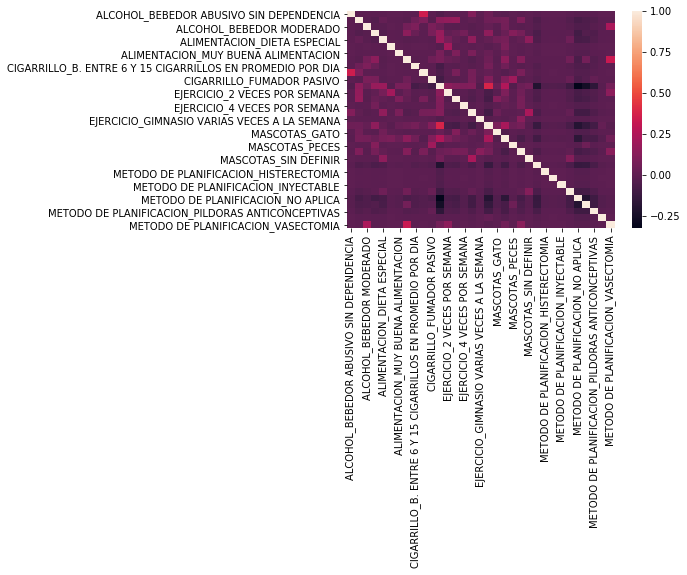

In [478]:
#Validación de colinealidad (correlación)
temp_df = df_log_x.corr().stack().reset_index().sort_values(by = 0, ascending = False)
print(temp_df[temp_df['level_0'] != temp_df['level_1']].head(10))
sns.heatmap(df_log_x.corr())

         Current function value: 0.542520
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  849
Model:                          Logit   Df Residuals:                      816
Method:                           MLE   Df Model:                           32
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                 0.08208
Time:                        12:29:07   Log-Likelihood:                -460.60
converged:                      False   LL-Null:                       -501.78
Covariance Type:            nonrobust   LLR p-value:                 2.550e-06
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
ALCOHOL_BEBEDOR ABUSIVO SIN DEPEND

/Users/luisrojas/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



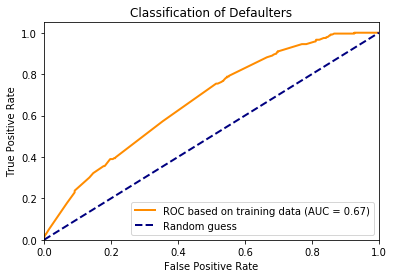

In [482]:
# En esta parte puede eliminar algunos dummies
#df_log_x.drop(['EJERCICIO_GIMNASIO VARIAS VECES A LA SEMANA'], axis='columns', inplace=True)

#Configura intercepto
df_log_x['Intercept'] = 1

logit_full1 = sm.Logit(df['qualitative_result'].astype('category').cat.codes, df_log_x)
logit_full1_res = logit_full1.fit()
predict_withvs = logit_full1_res.predict(df_log_x)
print(logit_full1_res.summary())

#%matplotlib inline

#Next we plot the ROC curve:
roc_vs = roc_curve(df['qualitative_result'].astype('category').cat.codes, predict_withvs)
auc_vs = auc( roc_vs[0], roc_vs[1] )

plt.figure()
line_width = 2
plt.plot(roc_vs[0], roc_vs[1], color='darkorange', lw=line_width,
         label=f"ROC based on training data (AUC = {auc_vs:0.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Defaulters')
plt.legend(loc='lower right')
plt.show()